<a href="https://colab.research.google.com/github/crislainesc/Jogo-da-Velha/blob/master/Atividade_Semana_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estatística e Probabilidade**



*   Conjunto de dados de previsão de risco de diabetes em estágio inicial.
*   [Early stage diabetes risk prediction](http://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#)



# **Leitura dos dados**

In [1]:
# criando ambiente no google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import ranksums
from scipy.stats import friedmanchisquare

In [3]:
dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Estatística e Probabilidade/Semana 8/diabetes_data_upload.csv")
dados.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# **Teste de Kolmogorov-Smirnov**

Testando a hipótese nula de que a distribuição dos dados é normal (Gaussiana)

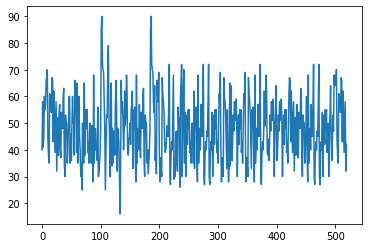

In [4]:
plt.plot(dados["Age"])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


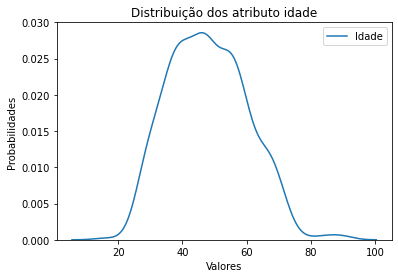

In [5]:
sns.distplot(dados["Age"], hist=False, rug=False,label='Idade')
plt.xlabel('Valores')
plt.ylabel('Probabilidades')
plt.title('Distribuição dos atributo idade')
plt.legend()
plt.show()

Pela análise visual do gráfico acima, é possível notar que a forma da curva não corresponde a uma distribuição normal.

**P-value**

$H_0$  = a amostra segue uma distribuição normal

$H_a$  = a amostra não segue uma distribuição normal

In [6]:
s, p = kstest(dados["Age"], "norm")
s, p

(1.0, 0.0)

In [7]:
if p < 0.05:
  print("Rejeita H0")
else:
  print("Falha em rejeitar H0")

Rejeita H0


De acordo com o teste de Kolmogorov-Smirnov o atributo **idade** da amostra não segue uma distribuição normal, pois o p-value foi igual a 0 consequentemente menor que 0.5 correspondendo a um nível de significância de 5%.

# **Teste de Wilcoxon para Amostras Independentes**

In [8]:
# trocando o tipo do atributo obesidade por um tipo numérico
dados["Obesity"] = dados["Obesity"].replace(["Yes", "No"], [1,0])
# dividindo as amostras em não obesos e obesos
nao_obesos = dados[dados.Obesity == 0].reset_index(drop=True)
obesos = dados[dados.Obesity == 1].reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


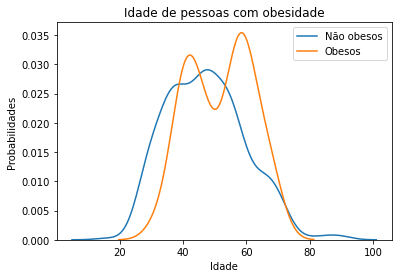

In [9]:
sns.distplot(nao_obesos["Age"], hist=False, rug=False, label="Não obesos")
sns.distplot(obesos["Age"], hist=False, rug=False, label="Obesos")
plt.xlabel("Idade")
plt.ylabel("Probabilidades")
plt.title("Idade de pessoas com obesidade")
plt.legend()
plt.show()

In [10]:
s, p = ranksums(nao_obesos["Age"], obesos["Age"])
s, p

(-3.6809326048314697, 0.00023238242779218235)

In [11]:
if p < 0.05:
  print("Rejeita H0")
else:
  print("Falha em rejeitar H0")

Rejeita H0


O teste de Wilcoxon tem como hipótese alternativa de que os valores das amostras afvém de distribuiçoes diferentes. Então, como era esperado as duas amostras não seguem uma distribuição normal.

# **Teste de Friedman**

* [Proyecto Final de Estadística](https://www.kaggle.com/luiguiparodi/testing)
* Algoritmo de rede híbrida para congestionamento de rede

In [12]:
testedb = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Estatística e Probabilidade/Semana 8/Test_DB.csv")
testedb.head()

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,64,4,UN,Client-Server,"0,1","0,839546","1,974686","308,491814","700,514102","0,352431",NaN,NaN,NaN,NaN,NaN
1,64,4,UN,Client-Server,"0,2","0,827412","9,556437","291,037663","864,599227","0,506302",NaN,NaN,NaN,NaN,NaN
2,64,4,UN,Client-Server,"0,3","0,802605","27,027618","264,928002","839,372851","0,638516",NaN,NaN,NaN,NaN,NaN
3,64,4,UN,Client-Server,"0,4","0,723403","61,848511","235,776888","1256,053108","0,767051",NaN,NaN,NaN,NaN,NaN
4,64,4,UN,Client-Server,"0,5","0,72121","121,085884","189,680044","1343,875577","0,807812",NaN,NaN,NaN,NaN,NaN


Para análise dos testes de Friedman e Nemenyi será este data set que contém dados de um algoritmo de rede híbrida para congestionamento de rede, os atributos a seres comparados serão o tempo de espera do canal, da entrada e resposta respectivamente.

In [13]:
tempo_espera_canal = testedb["Channel Waiting Time"].str.replace(",",".").astype(float)
tempo_espera_entrada = testedb["Input Waiting Time"].str.replace(",",".").astype(float)
tempo_resposta = testedb["Network Response Time"].str.replace(",",".").astype(float)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

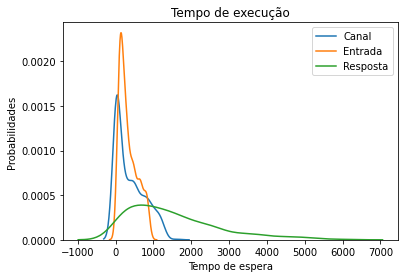

In [14]:
sns.distplot(tempo_espera_canal, hist=False, label="Canal")
sns.distplot(tempo_espera_entrada, hist=False, rug=False, label="Entrada")
sns.distplot(tempo_resposta, hist=False, rug=False, label="Resposta")
plt.xlabel("Tempo de espera")
plt.ylabel("Probabilidades")
plt.title("Tempo de execução")
plt.legend()
plt.show()

In [15]:
s, p = friedmanchisquare(tempo_espera_canal, tempo_espera_entrada, tempo_resposta)
s, p

(604.8031250000004, 4.663050161968462e-132)

In [16]:
if p < 0.5:
  print("Rejeita H0")
else:
  print("Falha em rejeitar H0")

Rejeita H0


De acordo com o teste de Friedman confirmou-se a hipótese alternativa de que pelo menos uma das amostras não segue a mesma distribuição das demais, pois o p-value é um número extremamente pequeno.

# **Teste de Nemenyi**

In [17]:
! pip install scikit-posthocs

In [18]:
from scikit_posthocs import posthoc_nemenyi

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
post = posthoc_nemenyi([tempo_espera_canal, tempo_espera_entrada, tempo_resposta])
post

,1,2,3
1,1.000000e+00,4.348717e-01,1.344829e-105
2,4.348717e-01,1.000000e+00,1.212756e-93
3,1.344829e-105,1.212756e-93,1.000000e+00


In [20]:
for i in range(len(post)):
  for j in range(i+1, len(post)):
    if post.iloc[i, j] < 0.05:
      print("Amostras",i,"e",j,"são diferentes")
    else:
      print("Amostras",i,"e",j,"são iguais")

Amostras 0 e 1 são iguais
Amostras 0 e 2 são diferentes
Amostras 1 e 2 são diferentes


Como a hipótese nula do teste de Friedman foi rejeitada, precisamos verificar se duas ou mais amostras podem ser estatísticamente equivalentes, então doi utilizado o teste post-hoc que verificou e difiniu que:
* A primeira e segunda amostra, tempo de espera do canal e tempo de espera da entrada são iguais.
* A primeira e terceira amostra, tempo de espera do canal e tempo de resposta são diferentes.
* E a segunda e tercerca amostra, tempo de espera da entrada e tempo de resposta são diferentes.

# **Conclusões**

Foram analisados dois data sets um contendo um conjunto de dados de previsão de risco de diabetes em estágio inicial onde aplicou-se os testes de Kolmogorov-Smirnov e de Wilcoxon para Amostras Independentes respectivamente e o outro contendo um conjunto de dados de um algortimo de rede híbrida para congestionamento de rede onde aplicou-se os testes de Friedman e Nemenyi respectivamente.